# Step 04

In [9]:
from scipy import signal
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

https://github.com/iver56/audiomentations

In [22]:
import IPython

IPython.display.Audio("4-phrase-egg.wav")

In [23]:
from scipy.io import wavfile

def readAudio(audio):
    fs, amp = wavfile.read(audio)
    dt = 1/fs
    n = len(amp)
    t = dt*n

    if t > 1.0:
        amp = amp[int((t/2 - 0.5)/dt):int((t/2 + 0.5)/dt)]
        n = len(amp)
        t = dt*n
    
    return(amp, fs, n, t)

Text(0.5, 1.0, 'signal')

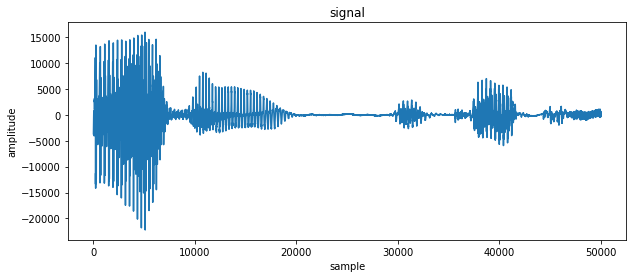

In [24]:
#amp, fs, n ,t = readAudio('./data/male_healthy/1032-a_n.wav')
amp, fs, n ,t = readAudio('4-phrase.wav')


fig = plt.figure(figsize=(10,4))

plt.plot(amp)
plt.ylabel('amplitude')
plt.xlabel('sample')
plt.title('signal')

# Equalizer 

In [4]:
import numpy as np
import pytest
from numpy.testing import assert_array_almost_equal

from audiomentations.augmentations.seven_band_parametric_eq import SevenBandParametricEQ

In [5]:
augmenter = SevenBandParametricEQ(p=1.0)

In [6]:
sample_rate = 44100

In [12]:
samples_out = augmenter(samples=amp, sample_rate=sample_rate)

Text(0.5, 1.0, 'signal')

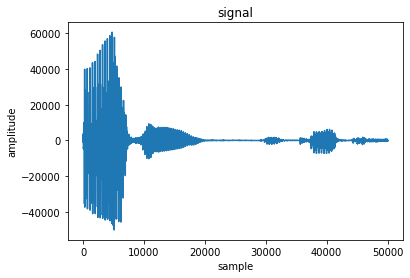

In [13]:
plt.plot(samples_out)
plt.ylabel('amplitude')
plt.xlabel('sample')
plt.title('signal')

# Loudness Normalization

In [17]:
import pytest

import numpy as np
from numpy.testing import assert_almost_equal

from audiomentations import LoudnessNormalization

In [26]:
sample_rate = 16000

augment = LoudnessNormalization(min_lufs_in_db=-32, max_lufs_in_db=-12, p=1.0)

In [31]:
sample_rate = 16000

augment = LoudnessNormalization(min_lufs_in_db=-32, max_lufs_in_db=-12, p=1.0)

In [32]:
samples = amp.astype(np.float32)

In [33]:
processed_samples = augment(samples=samples, sample_rate=sample_rate)

C:\ProgramData\Anaconda3\lib\site-packages\pyloudnorm\normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")


Text(0.5, 1.0, 'signal')

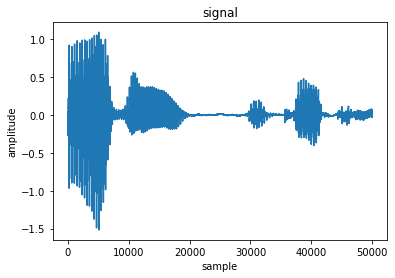

In [34]:
plt.plot(processed_samples)
plt.ylabel('amplitude')
plt.xlabel('sample')
plt.title('signal')

Anti-Aliasing
https://dspillustrations.com/pages/posts/misc/aliasing-and-anti-aliasing-filter.html

In [35]:
Fs = 5      # the sampling frequency
F_plot = 100  # the frequency used for plotting the time-continuous curves
T = 2       # the time-span we'll cover
t = np.arange(0, T, 1/Fs)  # the sample times
t_plot = np.arange(0, t.max(), 1/F_plot)  # time instants for plotting


def showAlias(f1):
    f2 = min(f1, Fs-f1)  # determine the alias frequency
    xt1 = lambda t: np.cos(2*np.pi*f1*t) # create both sine-functions
    xt2 = lambda t: np.cos(2*np.pi*f2*t)
    
    # plot the signals
    plt.subplot(121)
    plt.plot(t_plot, xt1(t_plot), 'b-', lw=2, label='input signal')
    plt.stem(t, xt1(t), label='sampled points')
    plt.plot(t_plot, xt2(t_plot), 'g-', label='after sampling')
    plt.xlabel('$t$'); plt.ylabel('$x(t), x[n]$')
    
    # plot the spectrum of the signals
    t_freq = np.arange(0, 20*T, 1/F_plot) 
    x1 = xt1(t_freq)
    x2 = xt2(t_freq)
    X1 = np.fft.fftshift(np.fft.fft(x1, 8*len(x1))) / len(x1)
    X2 = np.fft.fftshift(np.fft.fft(x2, 8*len(x1))) / len(x2)
    f = np.linspace(-F_plot/2, F_plot/2, len(X1), endpoint=False)
    plt.subplot(122)
    plt.plot(f, abs(X1), lw=2, label='input')
    plt.plot(f, abs(X2), label='after sampling')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


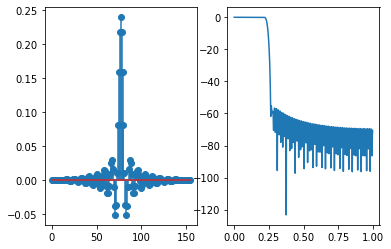

In [36]:
factor = 4  # the downsampling factor
b = signal.firwin(155, 1.0/factor-0.01); a=1  # design the filter
w, H = signal.freqz(b, a) # calculate frequency response

plt.subplot(121)
plt.stem(b)

plt.subplot(122)
plt.plot(w/np.pi, 20*np.log10(abs(H)))

In [37]:
def presentAliasingAudio(original, rate, factor):
    down_aliased = original[::factor] # dumb downsampling, no anti-aliasing

    b = signal.firwin(155, 1.0/factor-0.01); a=1  # design the AAF
    lowpass = signal.lfilter(b, a, original)      # apply the AAF
    down_nonaliased = lowpass[::factor]           # perform Downsampling

    display(HTML("Original:"), Audio(data=original, rate=rate))
    display(HTML("With Aliasing:"), Audio(data=down_aliased, rate=rate/factor))
    display(HTML("Without Aliasing:"), Audio(data=down_nonaliased,rate=rate/factor))

In [38]:
def loadAudio(url, start, length):
    R = requests.get(url)
    with open("sound.mp3", "wb") as f:
        f.write(R.content)
    !ffmpeg -y -i sound.mp3 sound.wav > /dev/null
    rate, data = wavfile.read("sound.wav")
    if len(data.shape) > 1:
        data = data.sum(axis=1)
    data = (1.0 * data / abs(data).max()).astype(np.float32)
    
    return rate, data[rate*start+np.arange(rate*length)]

In [43]:
start =40
length= 10

In [45]:
rate, data = wavfile.read("4-phrase-egg.wav")
if len(data.shape) > 1:
    data = data.sum(axis=1)
data = (1.0 * data / abs(data).max()).astype(np.float32)
#data[rate*start+np.arange(rate*length)]

Aliasing occurs during downsampling a digital or sampling an analog signal
The name Aliasing stems from the fact that several different frequencies on the original signal are mapped to the same sampled sequence, i.e. creating ambiguity in the sampled signal.
Aliasing can be mitigated by application of a low-pass filter before downsampling. The low-pass filter removes all frequencies above half the Nyquist-frequency and thus inhibits aliasing of high-frequencies into the lower frequencies.
In audio, aliasing can have different sounds, depending on the originating signal.